# Tutorial HDF5
### Door: Olivier Swaak

Een HDF5 bestand staat bestaat uit verschillende lagen:
1. De hoogste laag is het HDF5 bestand zelf. Deze heeft '.h5' als extensie.
2. Het bestand bestaat vervolgens uit verschillende groepen.
3. In deze groepen kunnen we vervolgens data opslaan (of nog meer groepen aanmaken). In ons geval wordt de data opgeslagen als tabellen.

Je kan het HDF5 bestand zien als het zipbestand waarin we onze data op willen slaan, de groepen als de mapjes in het zipbestand en de tabellen de csv bestandjes die in de mappen staan. Hiermee kan er een complexe hiërarchie aan mapjes samengevat en opgeslagen worden in 1 bestand.

Ik zal in deze tutorial ingaan op het opslaan van tabellen in een HDF5 bestand.
Voor meer informatie over de veelzijdigheid van HDF5, bekijk de video: https://www.youtube.com/watch?v=S74Kc8QYDac.

Deze tutorial is verder een korte samenvatting.
Voor een stap voor stap video tutorial van de module 'PyTables' raad ik de volgende video aan: https://www.youtube.com/watch?v=TSQNhL6AVGA.

*Voordat we beginnen*: Om een Jupyter notebook te kunnen gebruiken heeft je environment een 'kernel' nodig. Deze kernel zorgt ervoor dat je Jupyter notebook weet welke environment hij moet gebruiken en welke packages daarbij horen.
(Kijk of in 'Visual Studio Code' de 'Jupyter' extension is geïnstalleerd.)

Maak een nieuwe conda environment aan
<code>conda create --name HDF5tutorial ipykernel pytables matplotlib </code>
Open deze tutorial in Visual Studio Code
Vervolgens kan je dan rechtsboven aan de notebook je kernel selecteren:

1. Druk op 'Select Kernel'.
2. Kies 'Python environments'.
3. Selecteer HDF5tutorial

## **Stap 1**: maak een bestand aan

In [1]:
import tables as pt

Eerst importeren we de PyTables package.

In [2]:
h5file = pt.open_file('tutorial.h5', 'w')
print(h5file.list_nodes)

<bound method File.list_nodes of File(filename=tutorial.h5, title='', mode='w', root_uep='/', filters=Filters(complevel=0, shuffle=False, bitshuffle=False, fletcher32=False, least_significant_digit=None))
/ (RootGroup) ''
>


We openen hier een .h5 (HDF5) bestand.
Als deze nog niet bestaat, wordt deze automatisch eerst aangemaakt.

We openen het hier met <code>'w'</code> om ervoor te zorgen dat we voor deze tutorial steeds een schone hdf5 file aanmaken. Het kan misschien handig zijn om steeds aan hetzelfde bestand metingen toe te voegen. Dan moet je het bestand op een andere manier dan <code>'w'</code> openen.

# **Stap 2**: maak een groep aan (optioneel)

In [3]:
group = h5file.create_group(h5file.root, 'Group', 'Description')
print(h5file.list_nodes)

<bound method File.list_nodes of File(filename=tutorial.h5, title='', mode='w', root_uep='/', filters=Filters(complevel=0, shuffle=False, bitshuffle=False, fletcher32=False, least_significant_digit=None))
/ (RootGroup) ''
/Group (Group) 'Description'
>


Hierbij kunnen we zien we aan de 'root' van het bestand een extra groep hebben toegevoegd. We kunnen de root van het bestand eventueel ook aanduiden met '/' en aan groepen kunnen we ook weer extra groepen toevoegen:

In [4]:
group2 = h5file.create_group('/', 'Group 2', 'Description')
subgroup = h5file.create_group(group2, 'Subgroup', 'Description')

print(h5file.list_nodes)

<bound method File.list_nodes of File(filename=tutorial.h5, title='', mode='w', root_uep='/', filters=Filters(complevel=0, shuffle=False, bitshuffle=False, fletcher32=False, least_significant_digit=None))
/ (RootGroup) ''
/Group (Group) 'Description'
/Group 2 (Group) 'Description'
/Group 2/Subgroup (Group) 'Description'
>


c:\Users\avr276\anaconda3\envs\HDF5tutorial\Lib\site-packages\tables\path.py:137: NaturalNameWarning: object name is not a valid Python identifier: 'Group 2'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Om het te versimpelen zal ik de rest van de tutorial alleen maar 'group' gebruiken om alles in op te slaan en zal nu de andere groepen verwijderen. Maar het is belangrijk om te zien dat je dus een hele mappenstructuur kan maken.

In [5]:
group2._f_remove(recursive = True, force = True)

print(h5file.list_nodes)

<bound method File.list_nodes of File(filename=tutorial.h5, title='', mode='w', root_uep='/', filters=Filters(complevel=0, shuffle=False, bitshuffle=False, fletcher32=False, least_significant_digit=None))
/ (RootGroup) ''
/Group (Group) 'Description'
>


## **Stap 3**: maak een tabel aan

Om een tabel aan te maken hebben we eerst een 'description' nodig. Deze vertelt ons hoe het tabel in elkaar zit.

In [6]:
class Description(pt.IsDescription):
    value_a = pt.Float64Col()
    value_b = pt.Float64Col()
    timestamp = pt.Time64Col()

Hier maken we een 'class' aan (wat een class is staat in het volgende hoofdstuk van de handleiding). Deze 'class' heeft verschillende 'attributen' die corresponderen met de kolommen van het tabel. We geven de kolommen een naam: 'value_a', 'value_b' en 'timestamp' en geven vervolgens aan welk type waardes er in deze kolommen komen: 2x floats opgeschreven in 64 bits en 1x tijd opgeschreven in 64 bits.

In [7]:
table = h5file.create_table(group, 'Table', Description)

print(h5file.list_nodes)

<bound method File.list_nodes of File(filename=tutorial.h5, title='', mode='w', root_uep='/', filters=Filters(complevel=0, shuffle=False, bitshuffle=False, fletcher32=False, least_significant_digit=None))
/ (RootGroup) ''
/Group (Group) 'Description'
/Group/Table (Table(0,)) ''
  description := {
  "timestamp": Time64Col(shape=(), dflt=0.0, pos=0),
  "value_a": Float64Col(shape=(), dflt=0.0, pos=1),
  "value_b": Float64Col(shape=(), dflt=0.0, pos=2)}
  byteorder := 'little'
  chunkshape := (2730,)
>


## **Stap 4**: Sla de waardes op in het tabel

We slaan nu wat willekeurige waardes op in het tabel om te laten zien hoe dat moet.

In [8]:
import time
import random

In [9]:
for i in range(10):
    row = table.row

    row['value_a'] = random.random()
    row['value_b'] = random.random() * 2 + 2
    row['timestamp'] = time.time()

    row.append()

    time.sleep(0.1)

We maken dus per 'meting' een nieuwe rij aan. Hierin zetten we de waardes die we meten in de juiste kolommen, slaan de timestamp op en gaan door naar de volgende meting.

*Note: de <code>time.sleep</code> is hier alleen om een 'echte' meetserie te simuleren en is niet nodig voor HDF5.*

In [10]:
table.flush()
table.attrs['FIELD_0_UNIT'] = 'A'
table.attrs['FIELD_1_UNIT'] = 'B'

Met <code>table.flush()</code> voegen we het gemaakte tabel daadwerkelijk toe aan het bestand en met de twee lines eronder geven we metadata mee aan ons tabel. In dit geval de eenheden van de kolommen ('A' en 'B'). Nu kunnen we onze file afsluiten met:

In [11]:
pt.file._open_files.close_all()

Closing remaining open files:tutorial.h5...done


## **Stap 5**: Het tabel later aflezen

Aangezien we niet zomaar het HDF5 bestand kunnen aflezen (zoals bij een tekstbestand), moeten we het weer via Python openen. Als we het bestand in 'readmodus' openen (met 'r') kunnen we op de volgende manier de data er weer uit halen (en plotten).

In [12]:
read_file = pt.open_file('tutorial.h5', 'r')

print(read_file.list_nodes)

<bound method File.list_nodes of File(filename=tutorial.h5, title='', mode='r', root_uep='/', filters=Filters(complevel=0, shuffle=False, bitshuffle=False, fletcher32=False, least_significant_digit=None))
/ (RootGroup) ''
/Group (Group) 'Description'
/Group/Table (Table(10,)) ''
  description := {
  "timestamp": Time64Col(shape=(), dflt=0.0, pos=0),
  "value_a": Float64Col(shape=(), dflt=0.0, pos=1),
  "value_b": Float64Col(shape=(), dflt=0.0, pos=2)}
  byteorder := 'little'
  chunkshape := (2730,)
>


In [13]:
read_table = read_file.get_node('/Group/Table')
values_a = read_table.col('value_a')
values_b = read_table.col('value_b')
timestamps = read_table.col('timestamp')

In [14]:
import matplotlib.pyplot as plt

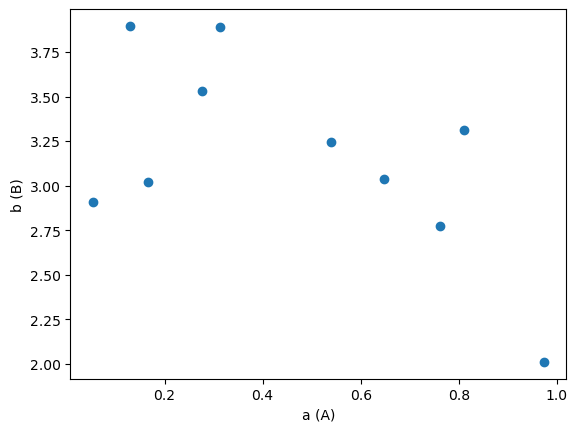

In [15]:
plt.scatter(values_a, values_b)
plt.xlabel(f"a ({read_table.attrs['FIELD_0_UNIT']})")
plt.ylabel(f"b ({read_table.attrs['FIELD_1_UNIT']})")
plt.show()

Dit is de data die we eerder hadden opgeslagen. Let wel op dat tijdstippen op een rare manier worden opgeslagen. Deze moet je nog op een manier converteren naar leesbare tijd.

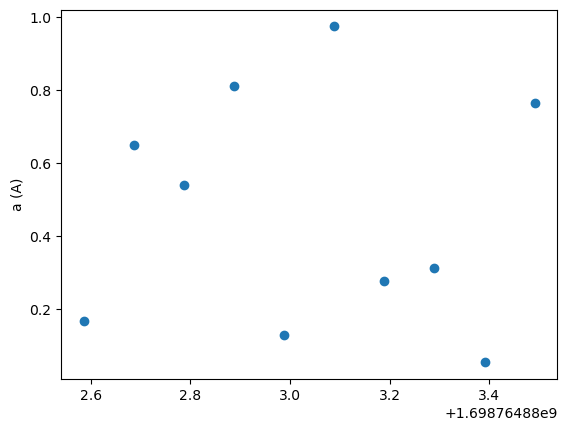

In [16]:
plt.scatter(timestamps, values_a)
plt.ylabel(f"a ({read_table.attrs['FIELD_0_UNIT']})")
plt.show()